# **<span style="font-size:larger;"> Part 1: <span style="color:blue">EDA and Cleaning</span>** #

# I. Understanding the Given Data

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

### Import & Explore Data

In [2]:
df = pd.read_csv("../datasets/given/train.csv")
df_test = pd.read_csv("../datasets/given/test.csv")

In [3]:
df.shape

(2051, 81)

In [4]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
df_test.shape

(878, 80)

In [6]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [7]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [8]:
df.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

# II. Data Cleaning - Fixing Data Types

### Changing Categorical Data to Numerical

In [9]:
# Creating dictionary (thanks for the idea, Chuck!)

cast_dict = {
        'Ex' : 5,
        'Gd' : 4,
        'TA' : 3,
        'Fa' : 2,
        'Po' : 1,
           0 : 0 }

In [10]:
# Using dictionary, plus a new dictionary for utilities

replace_dict_col = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond','Overall Qual',
                    'Heating QC','Overall Cond', 'Garage Qual','Garage Cond', 
                    'Kitchen Qual','Fireplace Qu', 'Pool QC']

for col in replace_dict_col:
    df[col].replace(cast_dict, inplace=True)
    df_test[col].replace(cast_dict, inplace=True)

df['BsmtFin Type 1'].replace({"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6}, inplace=True)
df_test['BsmtFin Type 1'].replace({"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6}, inplace=True)

df['BsmtFin Type 2'].replace({"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6}, inplace=True)
df_test['BsmtFin Type 2'].replace({"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6}, inplace=True)

df['Utilities'].replace({'AllPub': 1, 'NoSeWa': 0 , 'NoSewr' : 0}, inplace=True)
df_test['Utilities'].replace({'AllPub': 1, 'NoSeWa': 0 , 'NoSewr' : 0}, inplace=True)

### Changing Numerical Data to Categorical

In [11]:
df['MS SubClass'] = df['MS SubClass'].astype(str)
df_test['MS SubClass'] = df_test['MS SubClass'].astype(str)

df['Mo Sold'] = df['Mo Sold'].astype(str)
df_test['Mo Sold'] = df_test['Mo Sold'].astype(str)

### Removing Columns

In [12]:
#Dropping columns that do not hold important data

df.drop(columns = ['PID'],axis=1,inplace=True)
df_test.drop(columns = ['PID'],axis=1,inplace=True)

In [13]:
#Columns being dropped due to many missing values

df.drop(['Alley', 'Pool QC', 'Fence', 'Misc Feature', 'Fireplace Qu', 'Mas Vnr Type'],axis=1,inplace=True)
df_test.drop(['Alley', 'Pool QC', 'Fence', 'Misc Feature', 'Fireplace Qu', 'Mas Vnr Type'],axis=1,inplace=True)

# III. Data Cleaning - Identifying & Removing Major Outliers

### Identifying Outliers

In [14]:
# These columns were chosen after identifying boxplots with major outliers

col_of_interest = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area',
                   'Gr Liv Area', 'Garage Yr Blt', 'Wood Deck SF']

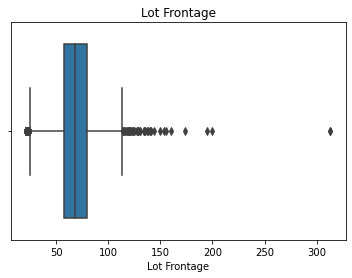

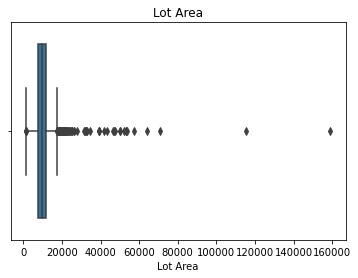

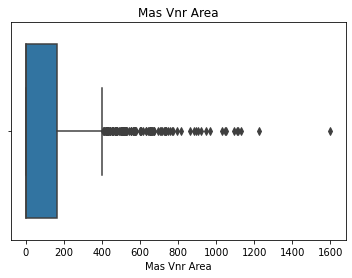

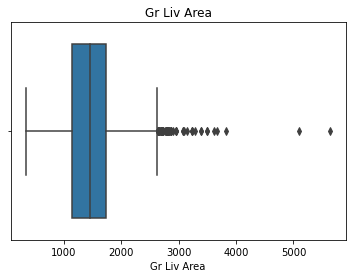

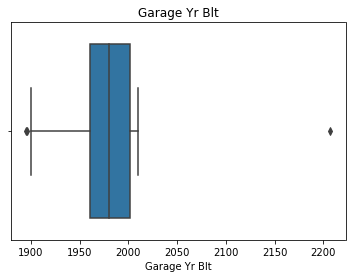

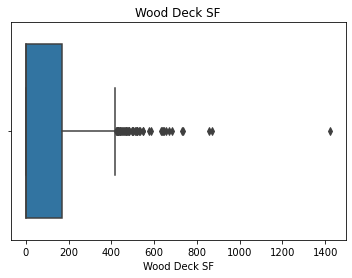

In [15]:
# Using a for loop to create all boxplots

for col in col_of_interest:
    sns.boxplot(df[col]).set(title = col)
    plt.show()

### Removing Outliers

In [16]:
df.drop(df.index[(df["Lot Frontage"] > 300)],axis=0,inplace=True)
df.drop(df.index[(df["Lot Area"] > 100_000)],axis=0,inplace=True)
df.drop(df.index[(df["Gr Liv Area"] > 5000)],axis=0,inplace=True)
df.drop(df.index[(df["Mas Vnr Area"] > 1400)],axis=0,inplace=True)
df.drop(df.index[(df["Garage Yr Blt"] > 2200)],axis=0,inplace=True)
df.drop(df.index[(df["Wood Deck SF"] > 1400)],axis=0,inplace=True)

In [17]:
# This has been coded out as it did not improve our model.

Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#df.drop(df.index[(df['SalePrice']< lower_bound)], axis=0, inplace=True)
#df.drop(df.index[(df['SalePrice']> upper_bound)], axis=0, inplace=True)

# IV. Data Cleaning - Null Values

### Organizing Columns into Categorical and Numerical

In [18]:
num_cols = df.select_dtypes(exclude='object').columns
cat_cols = df.select_dtypes(include='object').columns

print(f'The numerical columns are: {num_cols}.')
print(f'The categorical columns are: {cat_cols}.')

The numerical columns are: Index(['Id', 'Lot Frontage', 'Lot Area', 'Utilities', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1',
       'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Heating QC', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
       'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Yr Sold', 'SalePrice'],
      dtype='object').
The categorical columns are: Index(['MS SubClass', 'MS Zoning', 'Street', 'Lot Shape', 'Land Contour',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 

### Closer Look Into Null Values

In [19]:
df.isnull().sum()

Id                   0
MS SubClass          0
MS Zoning            0
Lot Frontage       327
Lot Area             0
Street               0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Area        21
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Heating              0
Heating QC           0
Central Air          0
Electrical           0
1st Flr SF           0
2nd Flr SF           0
Low Qual Fi

**For Training Data**

In [20]:
null_cols = [feature for feature in df.columns if df[feature].isnull().sum()>=1]
print(f'There are {len(null_cols)} columns that contain null values. \n\nThey are {null_cols}')

There are 20 columns that contain null values. 

They are ['Lot Frontage', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond']


In [21]:
null_cat_cols = set(null_cols) - set(num_cols)
print(f'There are {len(null_cat_cols)} categorical columns that contain null values. \n\nThey are: {null_cat_cols}')

There are 3 categorical columns that contain null values. 

They are: {'Garage Type', 'Garage Finish', 'Bsmt Exposure'}


In [22]:
null_num_cols = set(null_cols) - set(cat_cols)
print(f'There are {len(null_num_cols)} numerical columns that contain null values. \n\nThey are: {null_num_cols}')

There are 17 numerical columns that contain null values. 

They are: {'Bsmt Cond', 'BsmtFin SF 1', 'Total Bsmt SF', 'BsmtFin Type 1', 'Bsmt Qual', 'Garage Yr Blt', 'Garage Cars', 'Lot Frontage', 'BsmtFin SF 2', 'Garage Qual', 'Garage Cond', 'BsmtFin Type 2', 'Mas Vnr Area', 'Bsmt Unf SF', 'Bsmt Half Bath', 'Bsmt Full Bath', 'Garage Area'}


In [23]:
# Understanding how to handle categorical null values

for col in null_cat_cols:
    print(df[col].value_counts())
    print(df[col].isnull().sum())

Attchd     1206
Detchd      535
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64
113
Unf    848
RFn    576
Fin    505
Name: Garage Finish, dtype: int64
114
No    1338
Av     287
Gd     197
Mn     163
Name: Bsmt Exposure, dtype: int64
58


In [24]:
# Using a for loop to set null values for numerical values as mean of column.

for col in null_num_cols:
    df[col] = df[col].fillna(df[col].mean())
    
# Using a for loop to set null values for categorial values as 'NA'.

for col in null_cat_cols:
    df[col] = df[col].fillna('NA')

**For Testing Data**

In [25]:
num_test_cols = df_test.select_dtypes(exclude='object').columns
cat_test_cols = df_test.select_dtypes(include='object').columns

In [26]:
null_test_cols = [feature for feature in df_test.columns if df_test[feature].isnull().sum()>=1]
print(f'There are {len(null_test_cols)} columns that contain null values. \n\nThey are {null_test_cols}')

There are 13 columns that contain null values. 

They are ['Lot Frontage', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Electrical', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond']


In [27]:
null_cat_test_cols = set(null_test_cols) - set(num_test_cols)
print(f'There are {len(null_cat_test_cols)} categorical columns that contain null values. \n\nThey are: {null_cat_test_cols}')

There are 4 categorical columns that contain null values. 

They are: {'Garage Type', 'Garage Finish', 'Electrical', 'Bsmt Exposure'}


In [28]:
null_num_test_cols = set(null_test_cols) - set(cat_test_cols)
print(f'There are {len(null_num_test_cols)} numerical columns that contain null values. \n\nThey are: {null_num_test_cols}')

There are 9 numerical columns that contain null values. 

They are: {'Bsmt Cond', 'BsmtFin Type 1', 'Garage Yr Blt', 'Lot Frontage', 'Garage Qual', 'Garage Cond', 'BsmtFin Type 2', 'Mas Vnr Area', 'Bsmt Qual'}


In [29]:
# Using a for loop to set null values for numerical values as mean of column.

for col in null_num_test_cols:
    df_test[col] = df_test[col].fillna(df_test[col].mean())

# Using a for loop to set null values for categorial values as 'NA'.  
    
for col in null_cat_test_cols:
    df_test[col] = df_test[col].fillna('NA')

### Ensuring Null Values are Removed/Replaced

In [30]:
df.isnull().sum().sum()

0

In [31]:
df_test.isnull().sum().sum()

0

# V. EDA

### Pairplot

Taking a closer look at the correlation between the numerical features and the sale price.

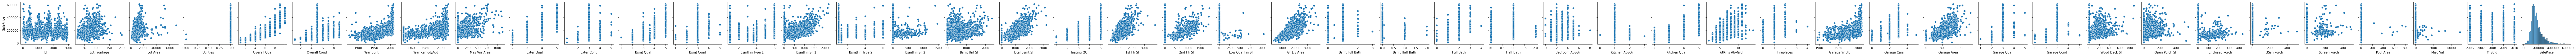

In [32]:
sns.pairplot(x_vars=num_cols, y_vars=['SalePrice'],data=df);

### Bar Charts

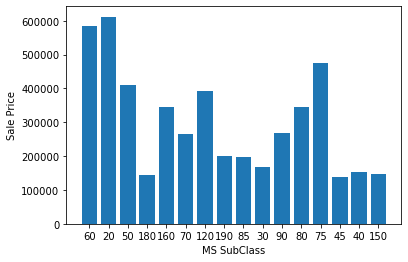

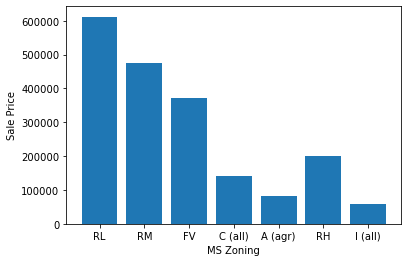

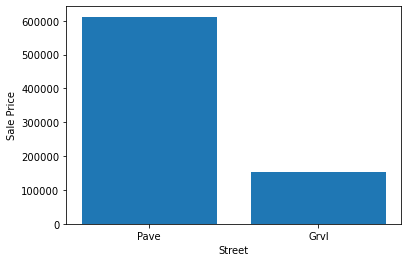

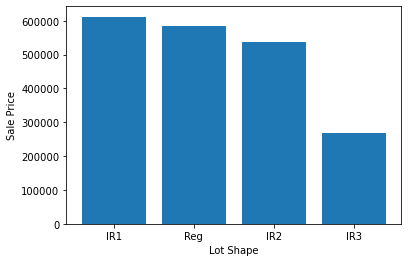

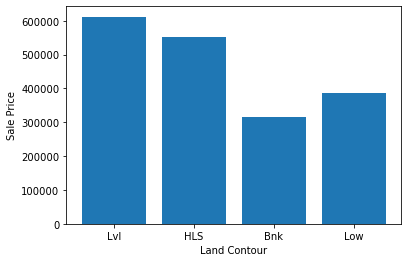

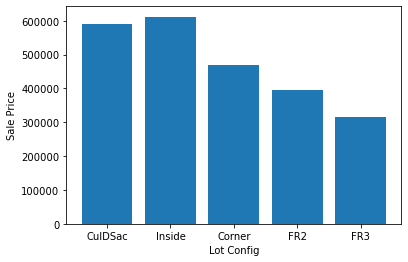

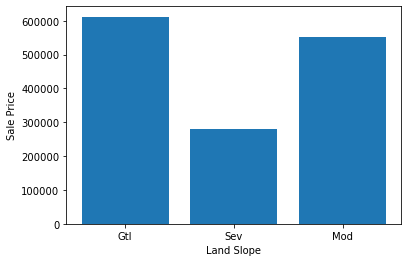

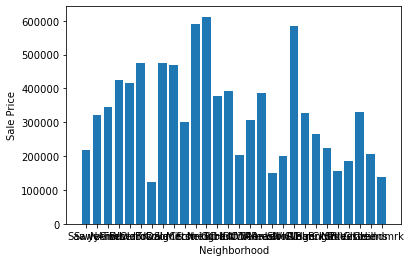

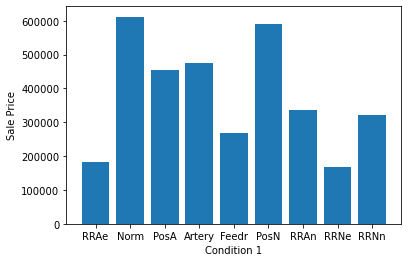

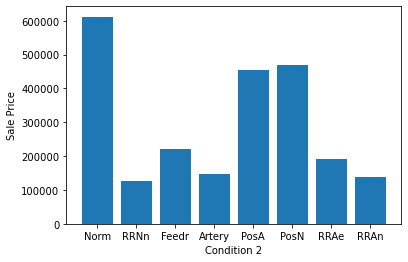

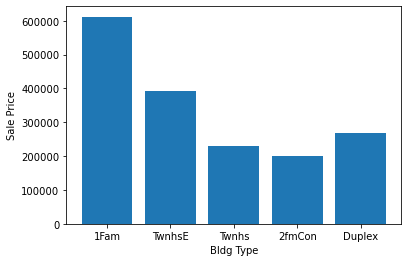

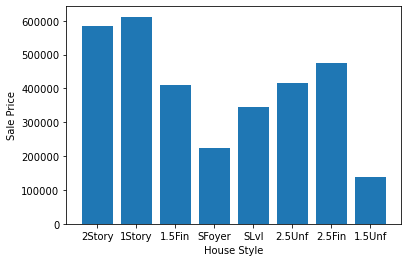

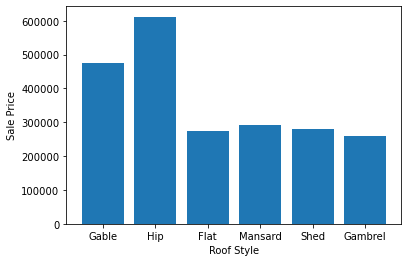

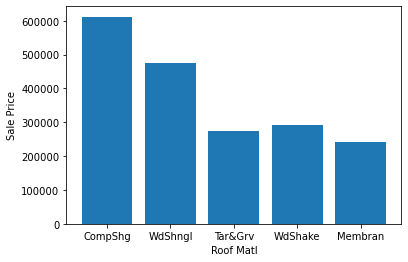

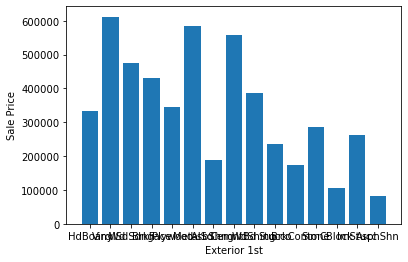

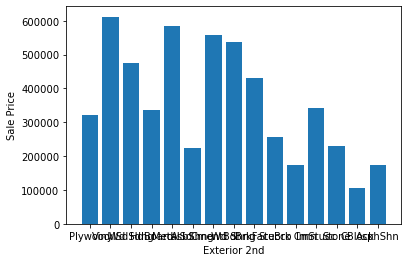

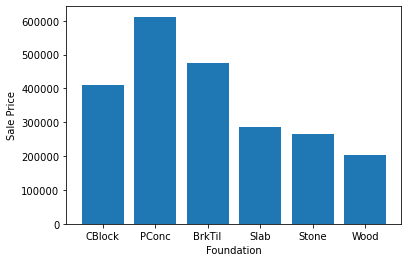

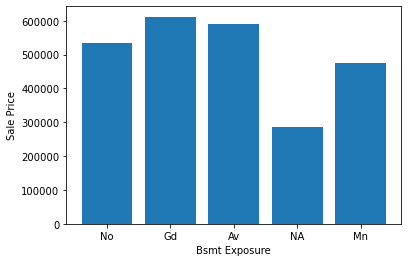

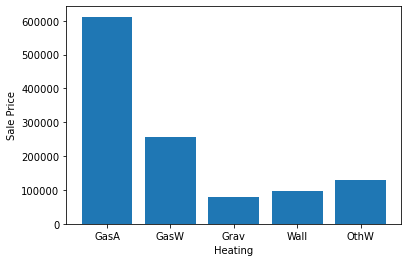

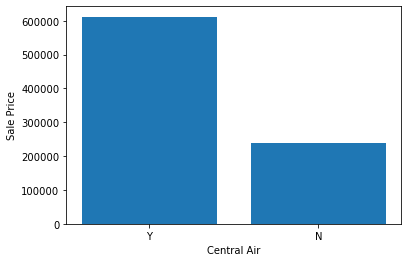

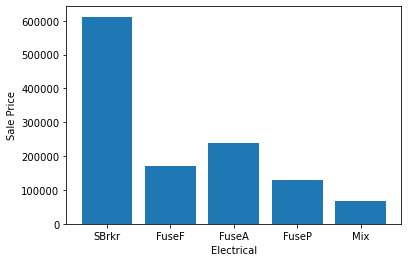

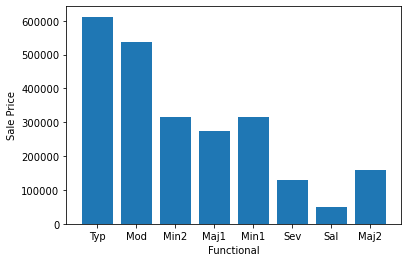

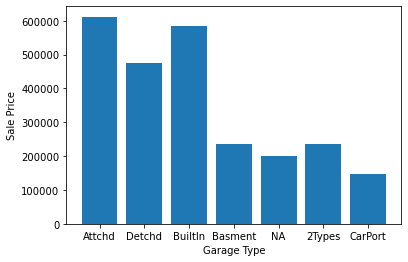

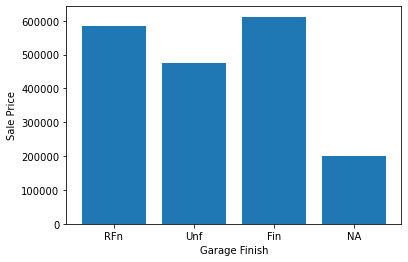

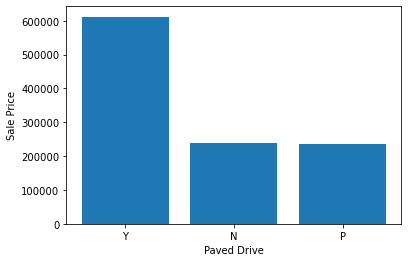

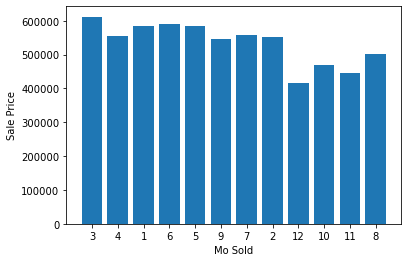

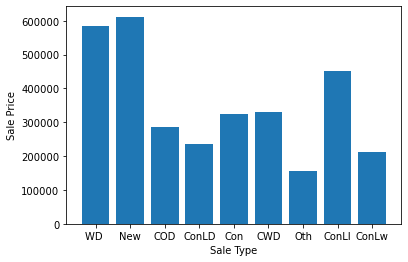

In [33]:
for col in cat_cols:
    plt.bar(df[col], df['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('Sale Price')
    plt.show()

### Heatmap

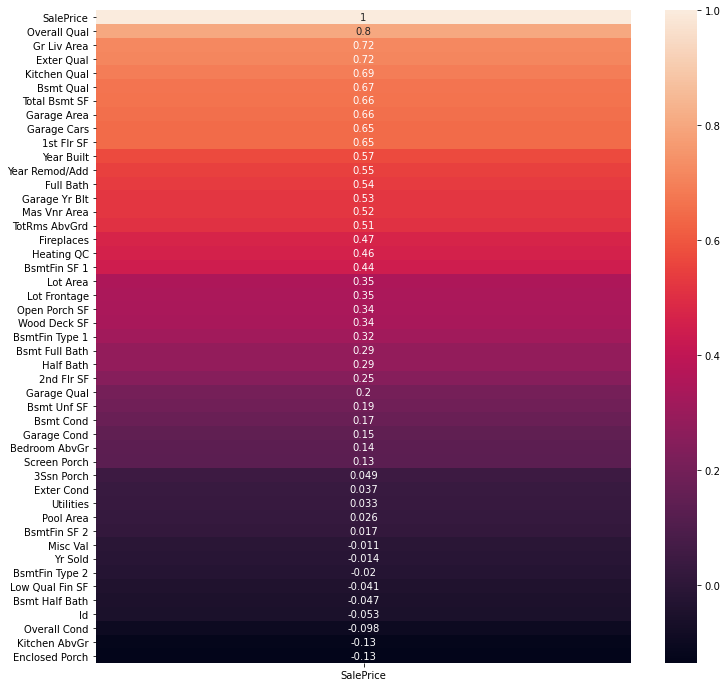

In [34]:
plt.figure(figsize=(12,12))

sns.heatmap(df.corr()[['SalePrice']].sort_values('SalePrice', ascending=False), annot=True);

## Dropping Low Correlated Features

**This has been coded out as it did not improve our model.**

In [35]:
# Grabbing list of columns with the lowest correlations with Sale Price

#col_list = df.columns

#low_corr = []
#for col in col_list:
    #if df[col].corr(df['SalePrice']) < 0.005 and df[col].corr(df['SalePrice']) > -0.005:
        #low_corr.append(col)
#print(low_corr)

### Histogram

Looking at the distribution of the sale prices using a histogram compared to the mean in black and median in orange.

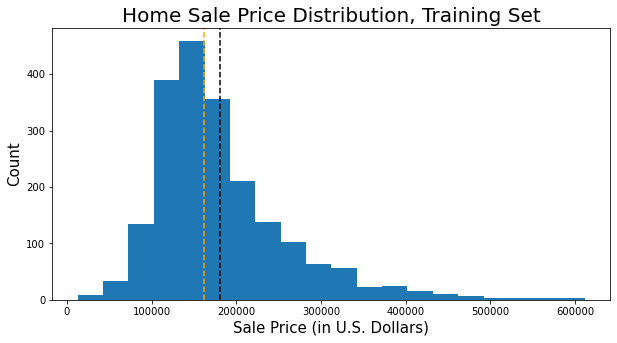

In [36]:
plt.figure(figsize=(10,5))

plt.title("Home Sale Price Distribution, Training Set", fontsize=20)

plt.xlabel("Sale Price (in U.S. Dollars)", fontsize=15)
plt.ylabel("Count", fontsize=15)

plt.hist(df['SalePrice'], bins = 20)
plt.axvline(np.mean(df['SalePrice']), color='k', linestyle='dashed');
plt.axvline(np.median(df['SalePrice']), color='orange', linestyle='dashed');

# VI. Getting Dummies

### Combining Data Frames

In [37]:
# Combining training and testing data frame before making dummies

df_both = pd.concat([df, df_test])
df_both.shape

(2921, 74)

In [38]:
df_both_dummies = pd.get_dummies(df_both)

### Splitting Data Frame

In [39]:
# After getting dummies, split the data back to training and testing DataFrame

df_dummies = df[['Id']].merge(df_both_dummies, how='left')
df_test_dummies = df_test[['Id']].merge(df_both_dummies, how='left').drop(columns=['SalePrice'])

# VII. Feature Interactions

In [40]:
# Adding interactions and dropping code that did not improve model

df_dummies['bedbathbeyond'] = df_dummies['Full Bath'] * df_dummies['Bedroom AbvGr'] * df_dummies['TotRms AbvGrd']
df_dummies['overallcondqual'] = df_dummies['Overall Cond'] * df_dummies['Overall Qual']
df_dummies['exter_condqual'] = df_dummies['Exter Cond'] * df_dummies['Exter Qual']
#df_dummies['garage_vol'] = df_dummies['Garage Cars'] * df_dummies['Garage Area']


df_test_dummies['bedbathbeyond'] = df_test_dummies['Full Bath'] * df_test_dummies['Bedroom AbvGr'] * df_test_dummies['TotRms AbvGrd']
df_test_dummies['overallcondqual'] = df_test_dummies['Overall Cond'] * df_test_dummies['Overall Qual']
df_test_dummies['exter_overallcondqual'] = df_test_dummies['Exter Cond'] * df_test_dummies['Exter Qual']
#df_test_dummies['garage_vol'] = df_test_dummies['Garage Cars'] * df_dummies['Garage Area']

#df_dummies.drop(columns = ['Overall Cond','Exter Cond'], inplace=True)
#df_test_dummies.drop(columns = ['Overall Cond','Exter Cond'], inplace=True)

#df_dummies.drop(columns = ['Overall Cond', 'Overall Qual', 'Exter Cond', 'Exter Qual'], inplace=True)
#df_test_dummies.drop(columns = ['Overall Cond', 'Overall Qual', 'Exter Cond', 'Exter Qual'], inplace=True)

# VIII. Saving Work

In [41]:
df_dummies.to_csv('../datasets/train_final.csv', index=False)
df_test_dummies.to_csv('../datasets/test_final.csv', index=False)